## Model Training

Here is the filename identifiers as per the official RAVDESS website:

Modality (01 = full-AV, 02 = video-only, 03 = audio-only).

Vocal channel (01 = speech, 02 = song).

Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).

Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.

Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
Repetition (01 = 1st repetition, 02 = 2nd repetition).
Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).
So, here's an example of an audio filename. 02-01-06-01-02-01-12.mp4 This means the meta data for the audio file is:
- Video-only (02)
- Speech (01)
- Fearful (06)
- Normal intensity (01)
- Statement "dogs" (02)
- 1st Repetition (01)
- 12th Actor (12) - Female (as the actor ID number is even)


### Importing the libraries

In [ ]:
import os #Operating System and File Operations
import pandas as pd #Dataframe
import matplotlib.pyplot as plt #Plotting Graphs
import librosa #Audio Processing
import librosa.display #Displaying Audio processing
import numpy as np #Mathematical Operations
import IPython.display as ipd  # To play sound in the notebook

In [27]:
RAV = "./RAVDESS/Combined/"
dir_list = os.listdir(RAV)
dir_list.sort()

emotion = []
gender = []
path = []
for i in dir_list:
    part = i.split('.')[0].split('-')
    emotion.append(int(part[2]))
    temp = int(part[6])
    if temp%2 == 0:
        temp = "female"
    else:
        temp = "male"
    gender.append(temp)
    path.append(RAV + i )

        
RAV_df = pd.DataFrame(emotion)
RAV_df = RAV_df.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
RAV_df = pd.concat([pd.DataFrame(gender),RAV_df],axis=1)
RAV_df.columns = ['gender','emotion']
RAV_df['labels'] =RAV_df.gender + '_' + RAV_df.emotion
RAV_df['source'] = 'RAVDESS'  
RAV_df = pd.concat([RAV_df,pd.DataFrame(path, columns = ['path'])],axis=1)
RAV_df = RAV_df.drop(['gender', 'emotion'], axis=1)
RAV_df.labels.value_counts()

labels
male_neutral       144
female_neutral     144
male_happy          96
female_happy        96
male_sad            96
female_sad          96
male_angry          96
female_angry        96
male_fear           96
female_fear         96
male_disgust        96
female_disgust      96
male_surprise       96
female_surprise     96
Name: count, dtype: int64

In [28]:
RAV_df.to_csv("RAVDESS.csv",index=False)

In [29]:
print(RAV_df)

               labels   source                                         path
0        male_neutral  RAVDESS  ./RAVDESS/Combined/03-01-01-01-01-01-01.wav
1      female_neutral  RAVDESS  ./RAVDESS/Combined/03-01-01-01-01-01-02.wav
2        male_neutral  RAVDESS  ./RAVDESS/Combined/03-01-01-01-01-01-03.wav
3      female_neutral  RAVDESS  ./RAVDESS/Combined/03-01-01-01-01-01-04.wav
4        male_neutral  RAVDESS  ./RAVDESS/Combined/03-01-01-01-01-01-05.wav
...               ...      ...                                          ...
1435  female_surprise  RAVDESS  ./RAVDESS/Combined/03-01-08-02-02-02-20.wav
1436    male_surprise  RAVDESS  ./RAVDESS/Combined/03-01-08-02-02-02-21.wav
1437  female_surprise  RAVDESS  ./RAVDESS/Combined/03-01-08-02-02-02-22.wav
1438    male_surprise  RAVDESS  ./RAVDESS/Combined/03-01-08-02-02-02-23.wav
1439  female_surprise  RAVDESS  ./RAVDESS/Combined/03-01-08-02-02-02-24.wav

[1440 rows x 3 columns]


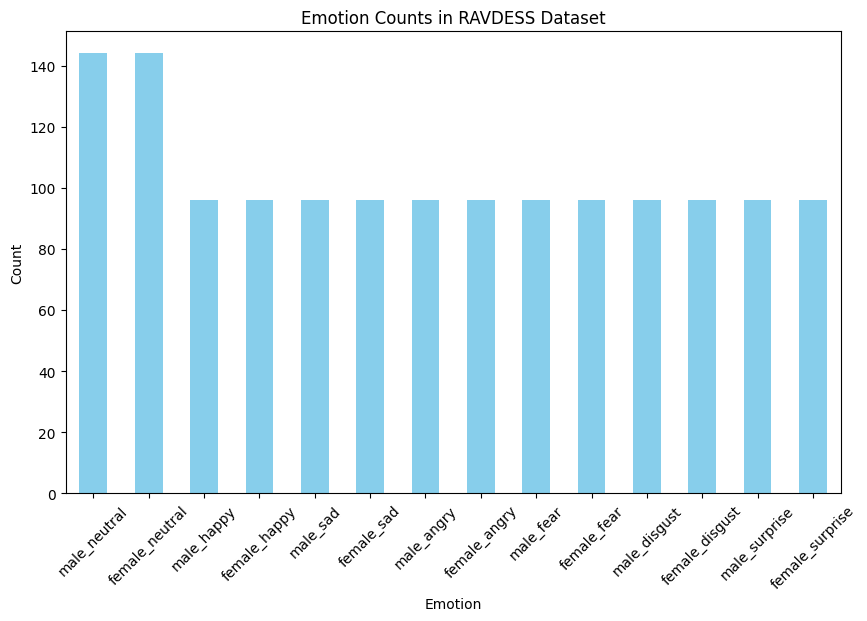

In [30]:
# Count the occurrences of each label
emotion_counts = RAV_df['labels'].value_counts()

# Plot the bar graph
emotion_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Emotion Counts in RAVDESS Dataset')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

We can see that the count of male_neutral and female_neutral is 144 each and happy ones are of 96 each.
Our main focus is on scoring positive when its neutral or positive. The score of other emotions such as sad, disgust, surprise will have a positive score but less value compared to positive and neutral ones.

The remaining one: anger and fear are to be considered negative.

Next Steps:
- Importing Librosa for spectrogram and wave
- Audio Wave
- LOG MEL SPECTROGRAM
- Data Augmentation (Mainly adding noise and pitch to the dataset will be the main changes)
- Feature Extraction
- Saving the features
- Data Preparation from the extracted features
- Choosing the appropiate model(will apply on 2-3 models)
- Checking their accuracy, precision and F-1 Score (accuracy target: > 60%)
- Final judgement for the model
- Saving and loading the standard model
- Audio segmentation and applying the model
- exporting visuals and tabluar data for the audio
- Creating a scoring model for the same